In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [6]:
df = pd.read_csv( 'cp-10k-GH-GetRepos-V3 - Main.csv') 
# Seleccionar columnas específicas
filcol = ['Name', 'Lang', 'Estrellas', 'Forks', 'Subs', 'Issues', 'Size']
df = df[filcol]
df.head()

,Name,Lang,Estrellas,Forks,Subs,Issues,Size
0,grit,Ruby,1965,536,72,30,7954
1,rubinius,C,3044,604,103,15,168069
2,god,Ruby,2204,521,87,432,2639
3,restful-authentication,Ruby,1573,277,17,27,1208
4,attachment_fu,Ruby,1024,324,10,35,1008


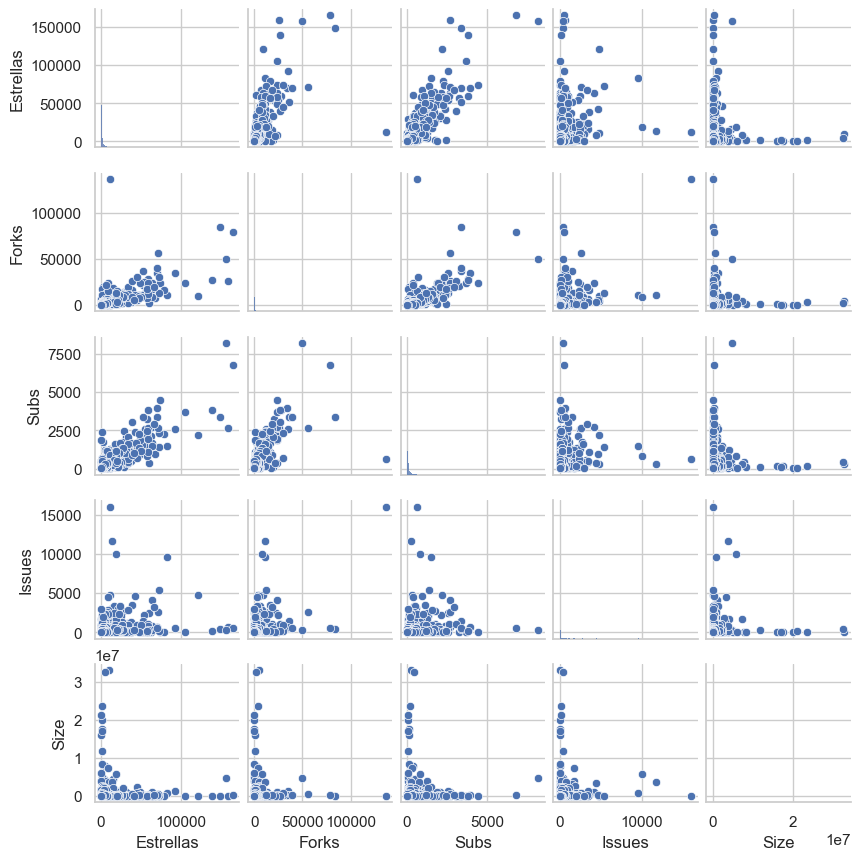

In [7]:
# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["Estrellas", "Forks", "Subs", "Issues","Size"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

<Axes: >

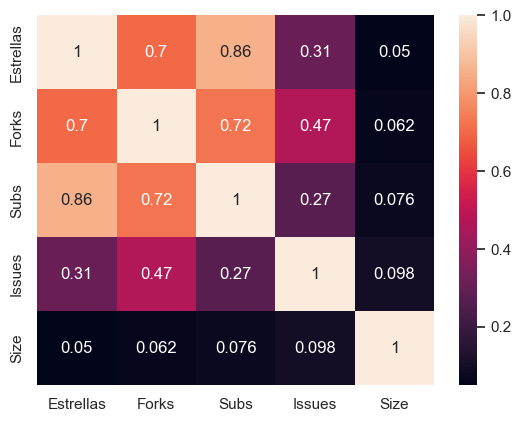

In [8]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [9]:
# Guardamos los datos de interes en una variable x e y
x = df['Subs'].values.reshape(-1,1) # variable independiente
y = df['Estrellas'].values.reshape(-1,1) # variable dependiente

In [10]:
# instanciamos el modelo de escalamiento
sc_x = StandardScaler()
sc_y = StandardScaler()

In [11]:
# estandarizamos los datos z=(x-u)/std
x_standard = sc_x.fit_transform(x)
y_standard = sc_y.fit_transform(y)

In [12]:
# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression() # Standar Linear Regression (slr)
slr.fit(x_standard,y_standard)

LinearRegression()

Text(0, 0.5, 'Mediana de las estrellas que se reciben por proyecto (Estrellas)')

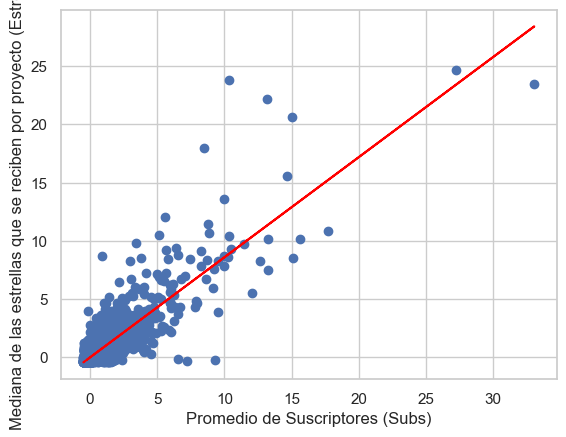

In [23]:
# Graficamos los datos estandarizados
plt.scatter(x_standard, y_standard)
# Graficamos la linea de regresion ajustada
plt.plot(x_standard, slr.predict(x_standard), color='red')

plt.xlabel("Promedio de Suscriptores (Subs)")
plt.ylabel("Mediana de las estrellas que se reciben por proyecto (Estrellas)")

In [27]:
# Representamos el numero de habitaciones de la casa que queremos predecir
numero_subs = 100

# Estandarizamos sc_x para predecir el predio de la casa
numero_subs_stand = sc_x.transform(np.array([numero_subs]).reshape(-1,1))

# Usamos la transformada inversa en el resultado para volver a la escala original 
result = sc_y.inverse_transform(slr.predict(numero_subs_stand))
print("Si el numero de subs es:",numero_subs, "El numero de estrellas", result)

Si el numero de subs es: 100 El numero de estrellas [[2366.78638469]]
